### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import functions
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [130]:
data = pd.read_csv('data/coupons.csv')

In [131]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

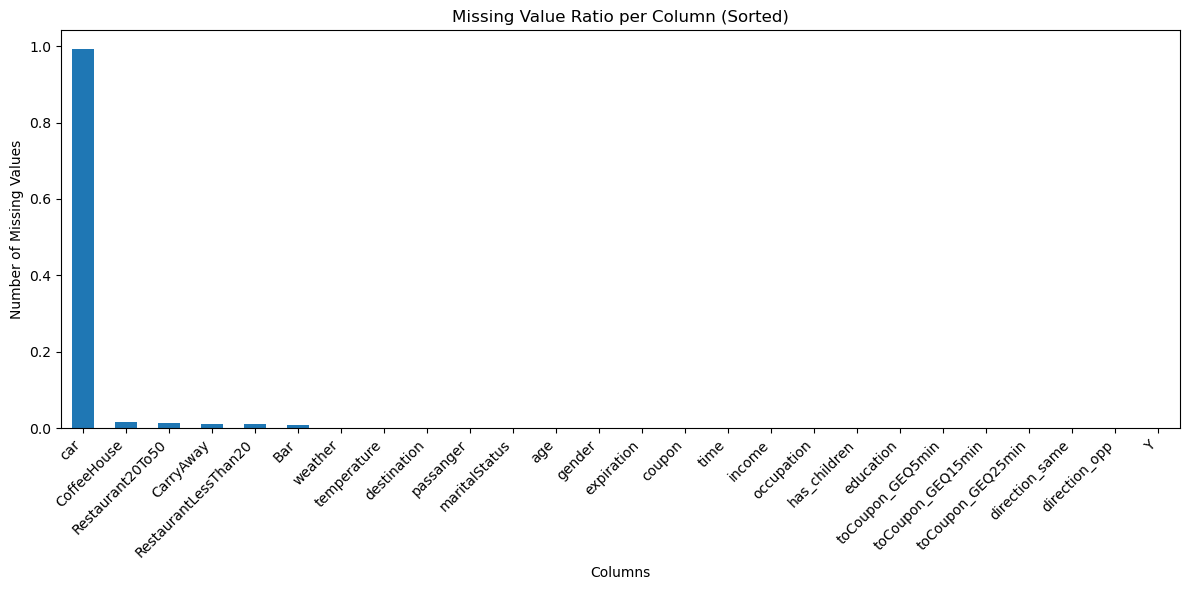

<Figure size 640x480 with 0 Axes>

In [132]:
# Gets the mean of missing values in each column. Since True = 1 and False = 0 the mean tells us how much of the data is missing.
missing_values = data.isnull().mean().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
missing_plot = missing_values.plot(kind='bar')

# Customize the plot
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Value Ratio per Column (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()
plt.savefig('images/data-cleanup/missing_plot.png')

In [133]:
# What are the values in the "car" column and how many rows have null values. 
data['car'].value_counts()
print(data['car'].value_counts())
percentage_of_missing_car = data['car'].isnull().mean() * 100
print(f"Percentage missing: {percentage_of_missing_car}")

# This process is abstracted hence forth with the inspect_dataframe_column() function

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64
Percentage missing: 99.14853358561967


In [134]:
# What are the values in the each column and how many rows have null/missing values. Same process as above with a for loop and function.
columns = data.columns
for column in columns:
    functions.inspect_dataframe_column(data, column)
    print("-------------------------")

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64
Percentage missing: 0.0
-------------------------
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
Percentage missing: 0.0
-------------------------
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64
Percentage missing: 0.0
-------------------------
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64
Percentage missing: 0.0
-------------------------
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64
Percentage missing: 0.0
-------------------------
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64
Percentage missing: 0.0
-------------------------
expiration
1d    7091
2h    5593
Name: count, dtype: 

3. Decide what to do about your missing data -- drop, replace, other...

## Data Cleanup

### Based on our inspection of the above dataframe columns we find that some values are missing. For the 'CoffeeHouse','Restaurant20To50','CarryAway','RestaurantLessThan20','Bar' it will suffice to replace the null values with the value "Unknown". By adding this value we leave the door open for a pattern to emerge for these unknown entries in future analysis, if there happend to be one. If for example a specific demographic disproportionately had a value set as "Unkonwn" there might be more going on. 

### The 'car' column on the other hand has more than 99% of data marked as null and is therefore not useful, so we will remove that column from the dataset. It might have been an issue with the user interface or form the user was presented with.

In [135]:
# We will thus remove the 'car' column from the dataframe...
data_clean = data.drop('car', axis=1)

# And replace the remaining null values with "Unknown".
data_clean = data_clean.fillna('Unknown')

# finally to make the column naming more consistent we'll change them to all caps
data_clean.columns = data_clean.columns.str.upper()

# Secondly we'll standardize the spacing for multiple word columns
# Create a dictionary that maps old column names to new ones
# Note that 'Y' has been renamed 'COUPON_SUCCESS' to indicate that the coupon was used by the customer.
column_names = {
    'Y': 'COUPON_SUCCESS',
    'MARITALSTATUS': 'MARITAL_STATUS',
    'COFFEEHOUSE': 'COFFEE_HOUSE',
    'RESTAURANTLESSTHAN20': 'RESTAURANT_LESS_THAN_20',
    'RESTAURANT20TO50': 'RESTAURANT_20_TO_50',
}

# Rename the columns
data_clean = data_clean.rename(columns=column_names)

# first 5 rows of the new clean dataframe.
data_clean.head(5)


,DESTINATION,PASSANGER,WEATHER,TEMPERATURE,TIME,COUPON,EXPIRATION,GENDER,AGE,MARITAL_STATUS,...,COFFEE_HOUSE,CARRYAWAY,RESTAURANT_LESS_THAN_20,RESTAURANT_20_TO_50,TOCOUPON_GEQ5MIN,TOCOUPON_GEQ15MIN,TOCOUPON_GEQ25MIN,DIRECTION_SAME,DIRECTION_OPP,COUPON_SUCCESS
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [136]:
# Get the proportion of coupons accepted
coupons_accepted = data_clean.query('COUPON_SUCCESS == 1').count()[['COUPON_SUCCESS']]
proportion_of_accepted_coupons = coupons_accepted  / data_clean.shape[0]
print(proportion_of_accepted_coupons)

COUPON_SUCCESS    0.568433
dtype: float64


5. Use a bar plot to visualize the `coupon` column.

[Text(0.5, 1.0, 'Acceptance Ratio of Different Types of Coupons')]

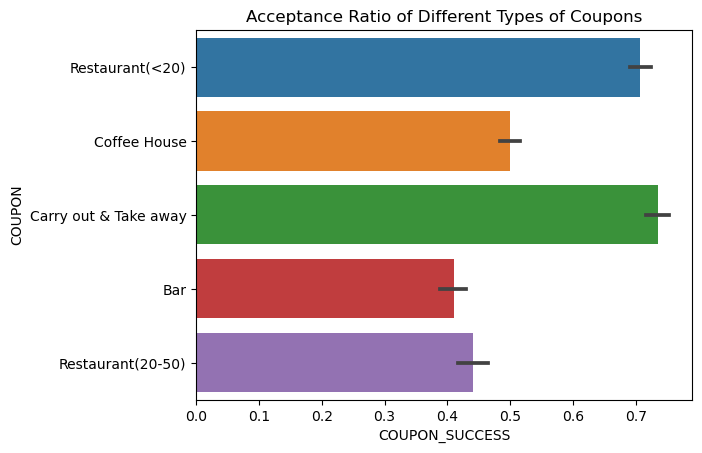

In [137]:

sns.barplot(data_clean, y='COUPON', x='COUPON_SUCCESS').set(title="Acceptance Ratio of Different Types of Coupons")

## Acceptance Ratio of Different Types of Coupons Analysis:

As you can see Carry out & Take away is the most accepted coupon followed by the inexpensive restaurant coupon. 

6. Use a histogram to visualize the temperature column.

[Text(0.5, 1.0, 'Acceptance of Coupons by Temperature Value (33, 55, 80 Farenheit)')]

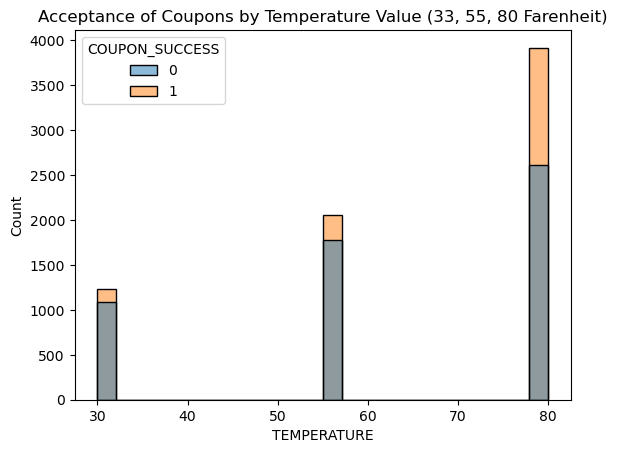

In [138]:
# Renaming some columns to make the plot more clear
plot = sns.histplot(data_clean, x="TEMPERATURE", hue="COUPON_SUCCESS")
plot.set(title="Acceptance of Coupons by Temperature Value (33, 55, 80 Farenheit)")


## Acceptance of Coupons by Temperature Value

As you can see the highest temparature of 80 degrees resulted in more than twice the coupon adoption. As a follow up lets investigate that temperature and see what the most popular coupons are at 80 degrees.

[Text(0.5, 1.0, 'Coupon Success in High Temperature by Coupon Name')]

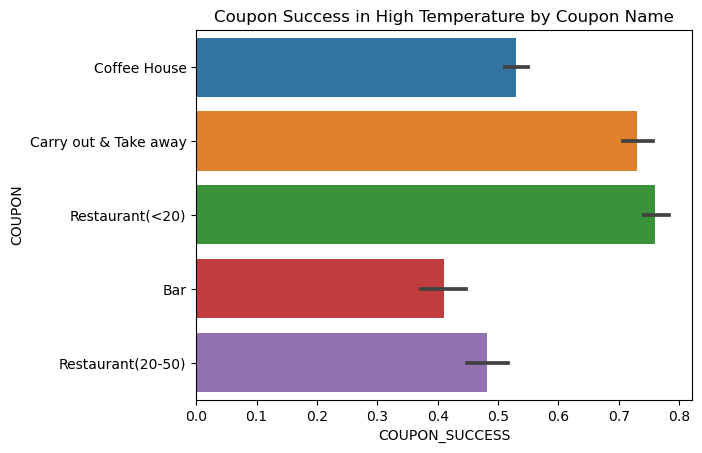

In [139]:
plot = sns.barplot(data_clean.query('TEMPERATURE == 80'), x="COUPON_SUCCESS", y="COUPON")
plot.set(title="Coupon Success in High Temperature by Coupon Name")

## Coupon Acceptance in High Temperature by Coupon Name Analysis

Interestingly the inexpencive restaurant (Restaurant(<20)) and the Carry out & Take Away coupons are the most popular in high heat conditions. Surprisingly the Bar coupon has the best performance. You'd think that people would want a refreshment at a bar to cool down, but that is not born out by the data. Based on this data analysis it appears that people perhaps don't want to cook in a hot kitchen and would rather be in a temperature controlled restaurant or at least have take out that doesn't require laborious cooking. Of course the actual reason for this two coupons exceptional performance isn't explained by the data, whatever the actual reason for this performance it does seem to be particularly effective. First of all the coupons in general are much more effective in hot days, and secondly they are especially effective for carry out and inexpensive restaurants.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [140]:
data_only_bar_coupon = data_clean.query("COUPON == 'Bar'")

2. What proportion of bar coupons were accepted?


In [141]:
proportion_of_bar_coupon_success = data_only_bar_coupon.query('COUPON_SUCCESS == 1').count()[['COUPON_SUCCESS']] / data_only_bar_coupon['COUPON_SUCCESS'].count()
print(proportion_of_bar_coupon_success)

COUPON_SUCCESS    0.410015
dtype: float64


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


0.7688442211055276
{'USER_TYPE': ['Frequent', 'Infrequent'], 'COUPON_SUCCESS': [0.7688442211055276, 0.37073707370737075]}


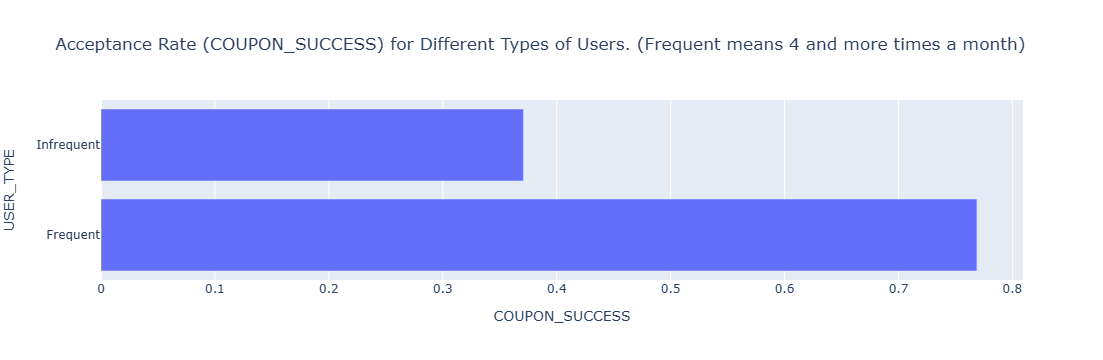

In [170]:
bar_coupon_success_for_frequent_user = data_only_bar_coupon.query("(BAR == '4~8') | (BAR == 'gt8')")[['COUPON_SUCCESS']].mean().values[0]
bar_coupon_success_for_infrequent_users = data_only_bar_coupon.query("(BAR != '4~8') & (BAR != 'gt8')")[['COUPON_SUCCESS']].mean().values[0]
print(bar_coupon_success_for_frequent_user)
# Create a DataFrame from your variables
bar_coupon_comparison = {
    'USER_TYPE': ['Frequent', 'Infrequent'],
    'COUPON_SUCCESS': [bar_coupon_success_for_frequent_user, bar_coupon_success_for_infrequent_users]
}
print(bar_coupon_comparison)
bar_coupon_comparison_df = pd.DataFrame(bar_coupon_comparison)

# Create a bar chart with Plotly
fig = px.bar(bar_coupon_comparison_df, y='USER_TYPE', x='COUPON_SUCCESS', title='Acceptance Rate (COUPON_SUCCESS) for Different Types of Users. (Frequent means 4 and more times a month)')
fig.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


0.7688442211055276
{'USER_TYPE': ['Casual Young Users', 'Others'], 'COUPON_SUCCESS': [0.6704545454545454, 0.38511678435632807]}


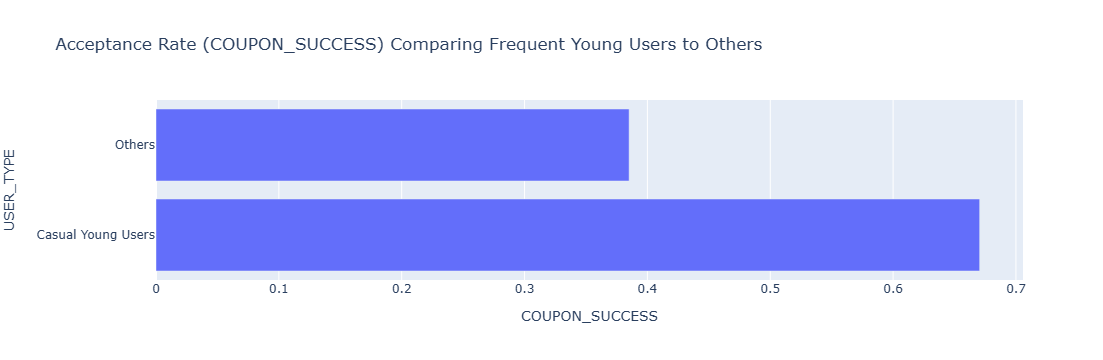

In [174]:
# Technically below 21 should not be required if the country was the United States as this would be illegal, but here for completeness.
under_25 = ['below21','21'] 
one_visit_a_month_or_more = ['1~3','4~8','gt8']
bar_coupon_success_for_casual_young_users = data_only_bar_coupon.query("BAR in @one_visit_a_month_or_more & AGE in @under_25")[['COUPON_SUCCESS']].mean().values[0]
bar_coupon_success_for_others = data_only_bar_coupon.query("not (BAR in @one_visit_a_month_or_more & AGE in @under_25)")[['COUPON_SUCCESS']].mean().values[0]
print(bar_coupon_success_for_frequent_user)
# Create a DataFrame from your variables
bar_coupon_comparison2 = {
    'USER_TYPE': ['Casual Young Users', 'Others'],
    'COUPON_SUCCESS': [bar_coupon_success_for_casual_young_users, bar_coupon_success_for_others]
}
print(bar_coupon_comparison2)
bar_coupon_comparison_df2 = pd.DataFrame(bar_coupon_comparison2)

# Create a bar chart with Plotly
fig2 = px.bar(bar_coupon_comparison_df2, y='USER_TYPE', x='COUPON_SUCCESS', title='Acceptance Rate (COUPON_SUCCESS) Comparing Frequent Young Users to Others')
fig2.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


0.7688442211055276
{'USER_TYPE': ['Casual Young Users', 'Others'], 'COUPON_SUCCESS': [0.717948717948718, 0.3770581778265642]}


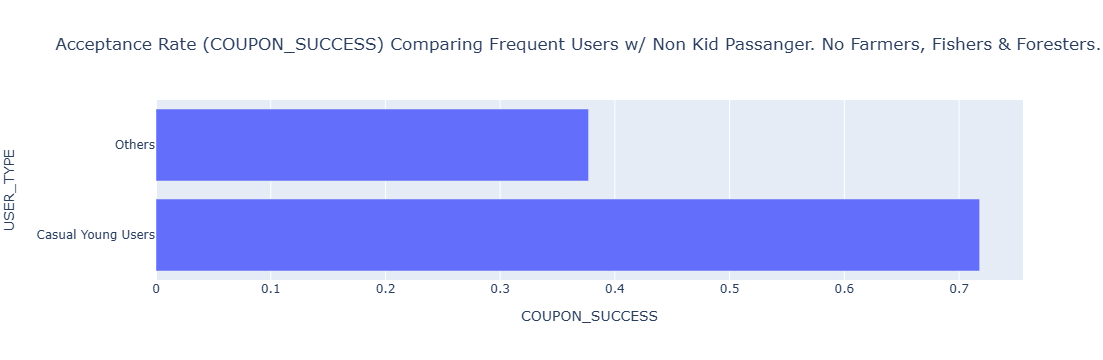

In [185]:
occupation = ['Farming Fishing & Forestry'] 
passanger = ['Kid(s)', 'Alone']
one_visit_a_month_or_more = ['1~3','4~8','gt8']
bar_coupon_success_for_casual_w_passanger = data_only_bar_coupon.query("BAR in @one_visit_a_month_or_more & OCCUPATION not in @occupation & PASSANGER not in @passanger")[['COUPON_SUCCESS']].mean().values[0]
bar_coupon_success_for_others = data_only_bar_coupon.query("not (BAR in @one_visit_a_month_or_more & OCCUPATION not in @occupation & PASSANGER not in @passanger)")[['COUPON_SUCCESS']].mean().values[0]
print(bar_coupon_success_for_frequent_user)
# Create a DataFrame from your variables
bar_coupon_comparison2 = {
    'USER_TYPE': ['Casual Young Users', 'Others'],
    'COUPON_SUCCESS': [bar_coupon_success_for_casual_w_passanger, bar_coupon_success_for_others]
}
print(bar_coupon_comparison2)
bar_coupon_comparison_df2 = pd.DataFrame(bar_coupon_comparison2)

# Create a bar chart with Plotly
fig3 = px.bar(bar_coupon_comparison_df2, y='USER_TYPE', x='COUPON_SUCCESS', title='Acceptance Rate (COUPON_SUCCESS) Comparing Frequent Users w/ Non Kid Passanger. No Farmers, Fishers & Foresters.')
fig3.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



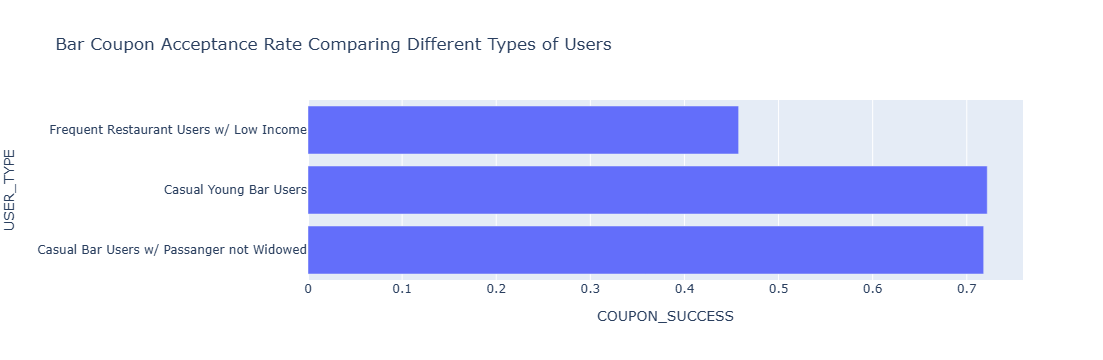

In [193]:
occupation_range = ['Farming Fishing & Forestry'] 
passanger_range = ['Kid(s)', 'Alone']
bar_frequency_range = ['1~3','4~8','gt8']
marital_status = ['Widowed']
age_range = ['below21','21', '26'] 
restaurant_frequency_range = ['4~8','gt8']
income_range = ['$25000 - $37499','$12500 - $24999','$37500 - $49999']
bar_coupon_success_for_casual_w_passanger_not_widowed = data_only_bar_coupon.query("BAR in @bar_frequency_range & MARITAL_STATUS not in @marital_status & PASSANGER not in @passanger")[['COUPON_SUCCESS']].mean().values[0]
bar_coupon_success_for_casual_under_30 = data_only_bar_coupon.query("BAR in @bar_frequency_range & AGE in @age_range")[['COUPON_SUCCESS']].mean().values[0]
bar_coupon_success_frequent_restaurant_low_income = data_only_bar_coupon.query("RESTAURANT_LESS_THAN_20 in @restaurant_frequency_range & INCOME in @income_range")[['COUPON_SUCCESS']].mean().values[0]
# Create a DataFrame from your variables
bar_coupon_comparison3 = {
    'USER_TYPE': ['Casual Bar Users w/ Passanger not Widowed', 'Casual Young Bar Users', 'Frequent Restaurant Users w/ Low Income'],
    'COUPON_SUCCESS': [bar_coupon_success_for_casual_w_passanger_not_widowed, bar_coupon_success_for_casual_under_30, bar_coupon_success_frequent_restaurant_low_income]
}
# print(bar_coupon_comparison3)
bar_coupon_comparison_df3 = pd.DataFrame(bar_coupon_comparison3)

# Create a bar chart with Plotly
fig4 = px.bar(bar_coupon_comparison_df3, y='USER_TYPE', x='COUPON_SUCCESS', title='Bar Coupon Acceptance Rate Comparing Different Types of Users')
fig4.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [186]:
columns = data_clean.columns
for column in columns:
    functions.inspect_dataframe_column(data_clean, column)
    print("-------------------------")

DESTINATION
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64
Percentage missing: 0.0
-------------------------
PASSANGER
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
Percentage missing: 0.0
-------------------------
WEATHER
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64
Percentage missing: 0.0
-------------------------
TEMPERATURE
80    6528
55    3840
30    2316
Name: count, dtype: int64
Percentage missing: 0.0
-------------------------
TIME
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64
Percentage missing: 0.0
-------------------------
COUPON
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64
Percentage missing: 0.0
-------------------------
EXPIRATION
1d    7091
2h    5593
Name: count, dtype: 